# 结构化数据分类

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import autokeras as ak

In [4]:
gpus = tf.config.list_physical_devices("GPU")

if gpus:
   
    gpu0 = gpus[1] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    # 或者也可以设置GPU显存为固定使用量(例如：4G)
    #tf.config.experimental.set_virtual_device_configuration(gpu0,
    #    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) 
    tf.config.set_visible_devices([gpu0],"GPU") 

In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

## 一个简单的例子

第一步是准备数据。 这里我们以 Titanic 数据集为例。

In [7]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

16384/13049 [=====================================] - 0s 0us/step


In [8]:
train_file_path

'/home/huangwei/.keras/datasets/train.csv'

In [9]:
test_file_path

'/home/huangwei/.keras/datasets/eval.csv'

第二步是运行 StructuredDataClassifier。是一个快速的演示，我们将 epochs 设置为 10。您也可以为最终数量的 epochs 保留未指定的 epochs。

In [10]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.

In [11]:
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    "survived",
    epochs=10,
)

Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.852173924446106

Best val_accuracy So Far: 0.8695651888847351
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.7286 - accuracy: 0.5215
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6616 - accuracy: 0.6236
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5910 - accuracy: 0.7289
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.5394 - accuracy: 0.7703
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5220 - accuracy: 0.7719
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5016 - accuracy: 0.7656
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4832 - accuracy: 0.7815
Epoch 8/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4618 - accuracy: 0.8102
Epoch 9/10
20/20 [===========

In [12]:
# Predict with the best model.
predicted_y = clf.predict(test_file_path)

9/9 [==============================] - 0s 3ms/step


In [13]:
# Evaluate the best model with testing data.
print(clf.evaluate(test_file_path, "survived"))

9/9 [==============================] - 0s 7ms/step - loss: 0.4498 - accuracy: 0.8030
[0.4497533142566681, 0.8030303120613098]


## 数据格式

AutoKeras StructuredDataClassifier 对于数据格式非常灵活。

上面的例子展示了如何直接使用 CSV 文件。 除了 CSV 文件，它还支持 numpy.ndarray、pandas.DataFrame 或 tf.data.Dataset。 数据应该是带有数值或分类值的二维数据。

对于分类标签，AutoKeras 接受普通标签（即字符串或整数）和单热编码标签（即 0 和 1 的向量）。 标签可以是 numpy.ndarray、pandas.DataFrame 或 pandas.Series。

以下示例展示了如何使用 numpy.ndarray、pandas.DataFrame 和 tensorflow.data.Dataset 准备数据。

In [14]:
# x_train as pandas.DataFrame, y_train as pandas.Series
x_train = pd.read_csv(train_file_path)
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("survived")
print(type(y_train))  # pandas.Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
# You can also use pandas.DataFrame for y_train.
y_train = pd.DataFrame(y_train)
print(type(y_train))  # pandas.DataFrame

<class 'pandas.core.frame.DataFrame'>


In [16]:
# You can also use numpy.ndarray for x_train and y_train.
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
print(type(x_train))  # numpy.ndarray
print(type(y_train))  # numpy.ndarray

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
# Preparing testing data.
x_test = pd.read_csv(test_file_path)
y_test = x_test.pop("survived")

In [18]:
# It tries 10 different models.
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)
# Feed the structured data classifier with training data.
clf.fit(x_train, y_train, epochs=10)

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7217391133308411

Best val_accuracy So Far: 0.8695651888847351
Total elapsed time: 00h 00m 19s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.6552 - accuracy: 0.6348
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 0.5685 - accuracy: 0.7528
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5146 - accuracy: 0.7990
Epoch 4/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4786 - accuracy: 0.8182
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4560 - accuracy: 0.8230
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4416 - accuracy: 0.8230
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4314 - accuracy: 0.8262
Epoch 8/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4233 - accuracy: 0.8293
Epoch 9/10
20/20 [==========

In [19]:
# Predict with the best model.
predicted_y = clf.predict(x_test)

9/9 [==============================] - 0s 3ms/step


In [20]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

9/9 [==============================] - 0s 7ms/step - loss: 0.4495 - accuracy: 0.7917
[0.44954922795295715, 0.7916666865348816]


以下代码显示了如何将 numpy.ndarray 转换为 tf.data.Dataset。

In [21]:
train_set = tf.data.Dataset.from_tensor_slices((x_train.astype(np.unicode), y_train))
test_set = tf.data.Dataset.from_tensor_slices(
    (x_test.to_numpy().astype(np.unicode), y_test)
)

In [22]:
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)
# Feed the tensorflow Dataset to the classifier.
clf.fit(train_set, epochs=10)

Trial 3 Complete [00h 00m 07s]
val_accuracy: 0.834782600402832

Best val_accuracy So Far: 0.8695651888847351
Total elapsed time: 00h 00m 19s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.7027 - accuracy: 0.4912
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5989 - accuracy: 0.7161
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5288 - accuracy: 0.8070
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.4771 - accuracy: 0.8086
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4476 - accuracy: 0.8166
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4315 - accuracy: 0.8278
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4216 - accuracy: 0.8405
Epoch 8/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4147 - accuracy: 0.8357
Epoch 9/10
20/20 [===========

In [23]:
# Predict with the best model.
predicted_y = clf.predict(test_set)

9/9 [==============================] - 0s 4ms/step


In [24]:
# Evaluate the best model with testing data.
print(clf.evaluate(test_set))

9/9 [==============================] - 0s 8ms/step - loss: 0.4332 - accuracy: 0.7917
[0.4331885278224945, 0.7916666865348816]


您还可以指定数据的列名和类型，如下所示。 如果训练数据已经有列名，则 column_names 是可选的，例如 pandas.DataFrame，CSV 文件。 任何未指定类型的列都将从训练数据中推断出来。

In [25]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    column_names=[
        "sex",
        "age",
        "n_siblings_spouses",
        "parch",
        "fare",
        "class",
        "deck",
        "embark_town",
        "alone",
    ],
    column_types={"sex": "categorical", "fare": "numerical"},
    max_trials=10,  # It tries 10 different models.
    overwrite=True,
)

## 验证数据

默认情况下，AutoKeras 使用最后 20% 的训练数据作为验证数据。 如下例所示，您可以使用validation_split 来指定百分比。

In [27]:
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

Trial 10 Complete [00h 00m 10s]
val_accuracy: 0.8674699068069458

Best val_accuracy So Far: 0.9036144614219666
Total elapsed time: 00h 01m 04s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.6685 - accuracy: 0.5965
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5859 - accuracy: 0.7448
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5398 - accuracy: 0.7735
Epoch 4/10
20/20 [==============================] - 0s 10ms/step - loss: 0.5012 - accuracy: 0.7863
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4772 - accuracy: 0.8102
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4573 - accuracy: 0.8198
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4471 - accuracy: 0.8134
Epoch 8/10
20/20 [==============================] - 0s 10ms/step - loss: 0.4385 - accuracy: 0.8150
Epoch 9/10
20/20 [=========

您还可以使用自己的验证集，而不是使用validation_data 将其从训练数据中分离出来。

In [28]:
split = 500
x_val = x_train[split:]
y_val = y_train[split:]
x_train = x_train[:split]
y_train = y_train[:split]
clf.fit(
    x_train,
    y_train,
    # Use your own validation set.
    validation_data=(x_val, y_val),
    epochs=10,
)

## 自定义搜索空间

对于高级用户，您可以使用 AutoModel 而不是 StructuredDataClassifier 自定义搜索空间。 您可以为一些高级配置配置 StructuredDataBlock，例如，categorical_encoding 是否使用 CategoricalToNumerical。 您也可以不指定这些参数，这将使不同的选择自动调整。 有关详细信息，请参阅以下示例。

In [29]:
input_node = ak.StructuredDataInput()
output_node = ak.StructuredDataBlock(categorical_encoding=True)(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=3
)
clf.fit(x_train, y_train, epochs=10)

Trial 3 Complete [00h 00m 05s]
val_loss: 0.4827120304107666

Best val_loss So Far: 0.4827120304107666
Total elapsed time: 00h 00m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
16/16 [==============================] - 1s 11ms/step - loss: 0.7504 - accuracy: 0.6480
Epoch 2/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6343 - accuracy: 0.6880
Epoch 3/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6346 - accuracy: 0.7100
Epoch 4/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.6980
Epoch 5/10
16/16 [==============================] - 0s 10ms/step - loss: 0.7022 - accuracy: 0.6720
Epoch 6/10
16/16 [==============================] - 0s 10ms/step - loss: 0.7020 - accuracy: 0.6760
Epoch 7/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6830 - accuracy: 0.6740
Epoch 8/10
16/16 [==============================] - 0s 10ms/step - loss: 0.6513 - accuracy: 0.6740
Epoch 9/10
16/16 [==================

AutoModel 的用法类似于 Keras 的函数式 API。 基本上，您正在构建一个图，其边是块，节点是块的中间输出。 使用 output_node = ak.[some_block]([block_args])(input_node) 添加从 input_node 到 output_node 的边。

您甚至还可以使用更细粒度的块来进一步自定义搜索空间。 请参阅以下示例。

In [30]:
input_node = ak.StructuredDataInput()
output_node = ak.CategoricalToNumerical()(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=1
)
clf.fit(x_train, y_train, epochs=1)

Trial 1 Complete [00h 00m 01s]
val_loss: 1.211087703704834

Best val_loss So Far: 1.211087703704834
Total elapsed time: 00h 00m 01s
INFO:tensorflow:Oracle triggered exit
16/16 [==============================] - 1s 10ms/step - loss: 2.4346 - accuracy: 0.5700
INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


In [31]:
clf.predict(x_train)

16/16 [==============================] - 0s 3ms/step


array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

您还可以将 AutoKeras 找到的最佳模型导出为 Keras 模型。

In [32]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                320       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)                0     

In [33]:
from tensorflow.keras.utils import plot_model

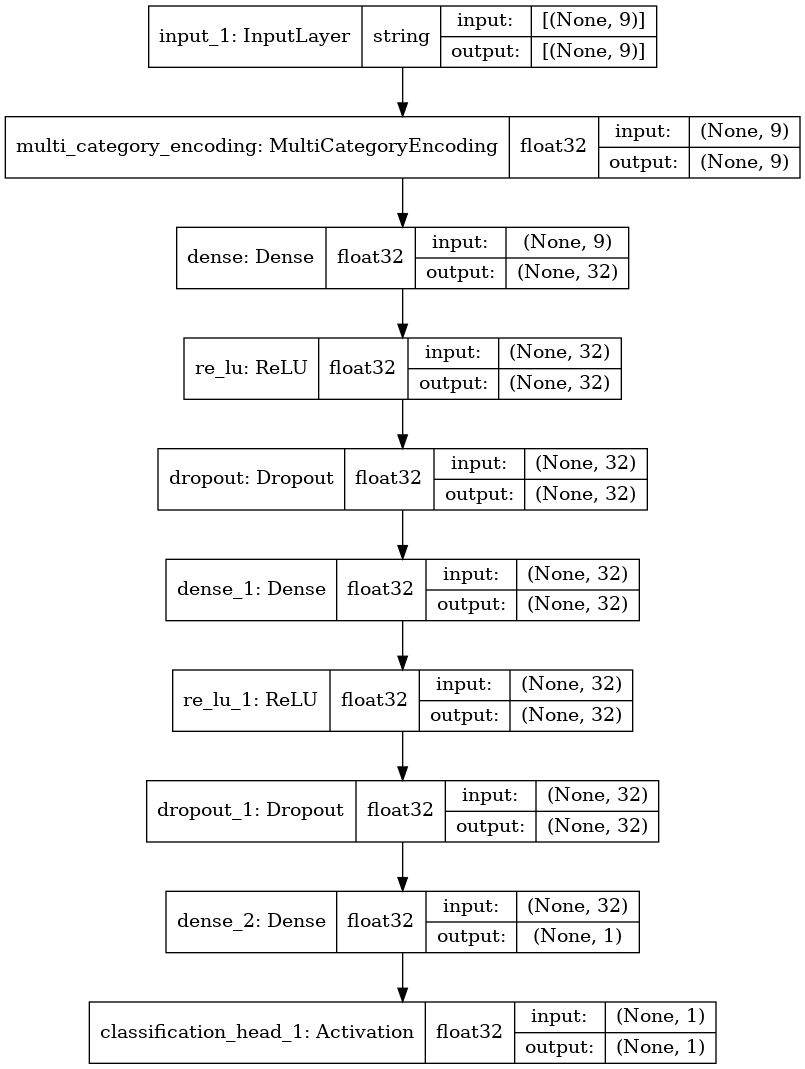

In [35]:
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [36]:
print(x_train.dtype)

object


In [37]:
# numpy array in object (mixed type) is not supported.
# convert it to unicode.
model.predict(x_train.astype(np.unicode))

array([[3.13760251e-01],
       [8.43706548e-01],
       [2.47430891e-01],
       [8.78135979e-01],
       [2.31523260e-01],
       [3.68984610e-01],
       [2.56239295e-01],
       [6.32628381e-01],
       [5.06593466e-01],
       [3.54298383e-01],
       [4.34076250e-01],
       [4.78311270e-01],
       [2.88701355e-01],
       [3.25971127e-01],
       [3.56232673e-01],
       [2.08304927e-01],
       [4.38211799e-01],
       [7.98979819e-01],
       [4.41838503e-01],
       [2.20573545e-01],
       [7.11351022e-05],
       [2.20718384e-01],
       [2.33010694e-01],
       [3.74256015e-01],
       [5.59962653e-02],
       [2.18877569e-01],
       [1.93009824e-02],
       [5.03915489e-01],
       [8.67464662e-01],
       [2.20719427e-01],
       [5.69701314e-01],
       [1.12580448e-01],
       [5.12741506e-01],
       [2.33717158e-01],
       [2.02920482e-01],
       [2.35987768e-01],
       [3.35524887e-01],
       [4.75414991e-01],
       [6.09615564e-01],
       [3.16916674e-01],
